In [2]:
# Closed and merge_ready tickets (fixed or implemented) for component Core Tor *modified* on April 2019 
# Query https://trac.torproject.org/projects/tor/query?status=closed&status=merge_ready&component=%5ECore+Tor&resolution=fixed&resolution=implemented&changetime=1+abr.+2019..30+abr.+2019&col=id&col=summary&col=component&col=status&col=type&col=priority&col=milestone&col=severity&col=actualpoints&col=points&col=sponsor&col=keywords&order=priority

csv_path='/Users/gaba/Code/torproject/trac/datasets/2019_april_closed_tickets.csv'

import pandas as pd
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

csv_file = pd.read_csv(csv_path)


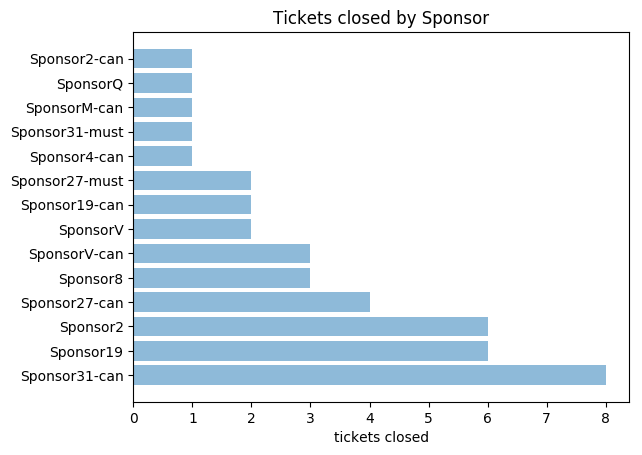

In [15]:
# which sponsors got ticket closed
sponsors_by_tickets_closed = csv_file['Sponsor'].value_counts()

objects = tuple(sponsors_by_tickets_closed.keys())
y_pos = np.arange(len(objects))
performance = list(sponsors_by_tickets_closed)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('tickets closed')
plt.title('Tickets closed by Sponsor')

plt.show()

In [16]:
# who closed tickets
csv_file['Owner'].value_counts()

teor           30
nickm          18
juga           16
atagar          7
rl1987          5
neel            4
dgoulet         3
mikeperry       2
pastly          1
catalyst        1
traumschule     1
yawning         1
Name: Owner, dtype: int64

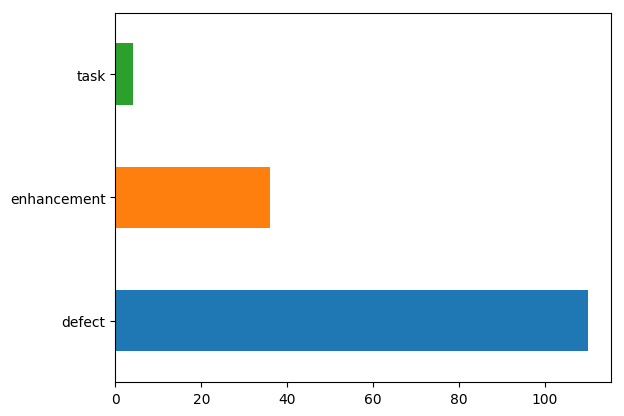

In [17]:
# What type of tickets we got
csv_file['Type'].value_counts().plot.barh()

In [18]:
# How many high and very high tickets
csv_file['Priority'].value_counts()

Medium       125
High          12
Low            8
Very High      3
Immediate      1
Very Low       1
Name: Priority, dtype: int64

In [8]:
# which milestone the tickets were for
csv_file['Milestone'].value_counts()

Tor: 0.4.1.x-final    9
Tor: 0.4.0.x-final    6
Tor: 0.3.5.x-final    5
Tor: unspecified      1
Tor: 0.3.4.x-final    1
Name: Milestone, dtype: int64

In [19]:
# How many 'big' tickets got resolved
csv_file['Points'].value_counts()


0.1     27
1.0     16
0.2     12
0.5      9
0.0      6
3.0      4
0.3      2
15.0     2
2.0      2
10.0     2
Name: Points, dtype: int64

In [27]:
# How tickets got resolved
csv_file['Resolution'].value_counts()

fixed               85
implemented         22
duplicate           13
wontfix              8
not a bug            7
user disappeared     2
worksforme           2
invalid              1
Name: Resolution, dtype: int64

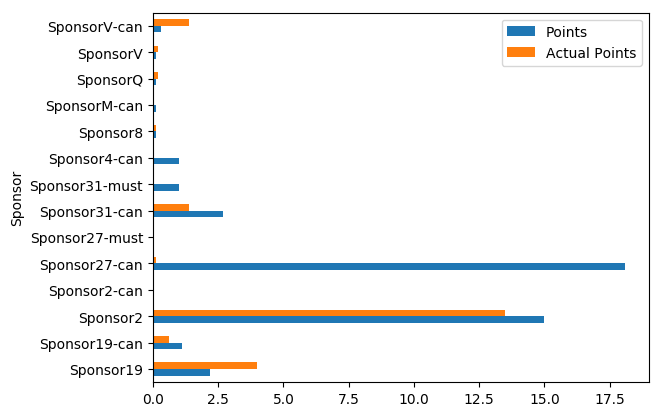

In [28]:
# How many days took to complete the ticket versus estimation
csv_file.filter(items=['Sponsor', 'Points', 'Actual Points']).groupby('Sponsor').sum().plot.barh()



In [8]:
# Velocity for the month of April

csv_file.filter(items=['Actual Points']).sum()

# Estimation of capacity for April
# Calculated here: https://nc.riseup.net/apps/onlyoffice/270863?filePath=%2FDocuments%2FTeams%2FNetwork%2FTeam%20Capacity.xlsx


Actual Points    24.0
dtype: float64

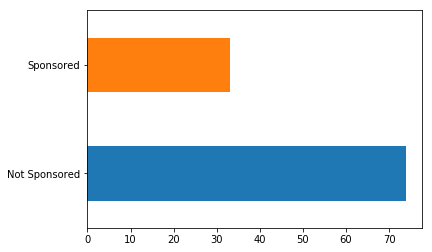

In [25]:
# How much work was not sponsored

sponsor_and_not = csv_file['Sponsor'].notnull().value_counts().rename(lambda x: 'Sponsored' if x else 'Not Sponsored')

sponsor_and_not.plot.barh()


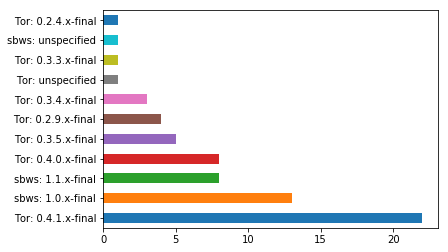

In [29]:
# From all not sponsored work which releases they went into

not_sponsored_work = csv_file[csv_file.Sponsor.isnull()]
not_sponsored_work['Milestone'].value_counts().plot.barh()


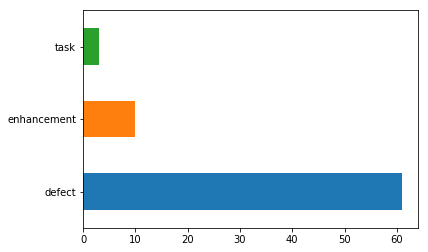

In [30]:
# What is this non sponsored work

not_sponsored_work['Type'].value_counts().plot.barh()

In [31]:
# We understnd bugs and want to track which specific non sponsored enhancement we are prioritizing. 
not_sponsored_work.query('Type=="enhancement"')

# It seems that this are all tickets that were: 
# . closed some time ago but just recently commented.
# . tickets that volunteers worked on
# . updates to scripts (like #30114)


,id,Summary,Sponsor,Resolution,Component,Status,Type,Priority,Milestone,Severity,Actual Points,Points,Keywords
1,24902,Denial of Service mitigation subsystem,NaN,fixed,Core Tor/Tor,closed,enhancement,Very High,Tor: 0.3.3.x-final,Normal,NaN,NaN,"tor-dos, tor-relay, review-group-30, 029-backp..."
2,29357,add an ActiveOnStartup config option,NaN,fixed,Core Tor/Tor,closed,enhancement,Very High,Tor: 0.4.0.x-final,Normal,0.1,0.5,"tbb-needs, 040-proposed, 040-must"
4,21377,DirAuths should expose bwauth bandwidth files,NaN,fixed,Core Tor/Tor,closed,enhancement,High,Tor: 0.4.0.x-final,Normal,0.3,0.2,"authority-test-done, tor-dirauth, metrics-need..."
16,22022,Move to cryptography for ed25519 validation,NaN,implemented,Core Tor/Stem,closed,enhancement,Medium,NaN,Minor,NaN,NaN,descriptor unactionable
22,26937,sbws: Warn when there is not enough disk space,NaN,fixed,Core Tor/sbws,closed,enhancement,Medium,sbws: 1.0.x-final,Normal,NaN,NaN,NaN
36,28495,Please provide a parser for detached signatures,NaN,fixed,Core Tor/Stem,closed,enhancement,Medium,NaN,Normal,NaN,NaN,NaN
74,29992,Update to April GeoIP2 database,NaN,implemented,Core Tor/Tor,closed,enhancement,Medium,Tor: 0.2.9.x-final,Normal,NaN,NaN,"tor-client, tor-relay, 029-backport, 032-backp..."
88,30114,Also fetch tor-github when we git-pull-all.sh,NaN,fixed,Core Tor/Tor,closed,enhancement,Medium,Tor: 0.4.1.x-final,Normal,0.1,0.1,"git-scripts, fast-fix, asn-merge"
92,30122,Make stem's unit tests propagate the backtrace...,NaN,fixed,Core Tor/Stem,closed,enhancement,Medium,NaN,Normal,0.6,0.5,tor-ci-fail-sometimes
106,30137,Update PyPI links,NaN,fixed,Core Tor/Stem,closed,enhancement,Low,NaN,Minor,NaN,NaN,NaN


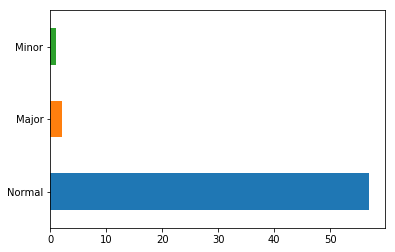

In [33]:
# What are the not sponsored bugs fixed?
not_sponsored_work.query('Type=="defect"')['Severity'].value_counts().plot.barh()

In [36]:
not_sponsored_work.query('Type=="defect"').query('Severity=="Minor"')

,id,Summary,Sponsor,Resolution,Component,Status,Type,Priority,Milestone,Severity,Actual Points,Points,Keywords
96,30176,Clear memory in smartlist_remove_keeporder.,NaN,fixed,Core Tor/Tor,closed,defect,Medium,Tor: 0.4.1.x-final,Minor,NaN,NaN,035-backport? 040-backport? defense-in-depth? ...


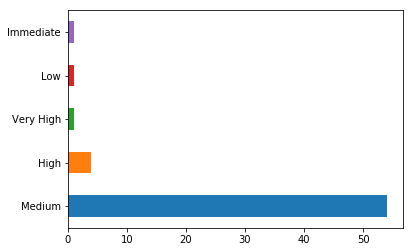

In [39]:
not_sponsored_work.query('Type=="defect"')['Priority'].value_counts().plot.barh()

In [37]:
not_sponsored_work.query('Type=="defect"').query('Priority=="Low"')

,id,Summary,Sponsor,Resolution,Component,Status,Type,Priority,Milestone,Severity,Actual Points,Points,Keywords
102,13221,Misleading error messages about bind_ipv4_only...,NaN,fixed,Core Tor/Tor,closed,defect,Low,Tor: 0.3.5.x-final,Normal,0.1,0.1,"041-proposed, tor-client, easy, logging, messa..."


In [41]:
not_sponsored_work.query('Type=="defect"').query('Severity=="Normal"')

,id,Summary,Sponsor,Resolution,Component,Status,Type,Priority,Milestone,Severity,Actual Points,Points,Keywords
0,26671,"V3BWFile.write is not a class/static method, b...",NaN,fixed,Core Tor/sbws,closed,defect,Immediate,sbws: 1.0.x-final,Normal,NaN,NaN,sbws-1.0must
3,29967,CID 1444262: Null-pointer dereference in non-f...,NaN,fixed,Core Tor/Tor,closed,defect,Very High,Tor: 0.4.1.x-final,Normal,0.0,0.0,"regression, crash, asn-merge, coverity"
9,29665,hs: circuit_expire_old_circuits_serverside() s...,NaN,fixed,Core Tor/Tor,closed,defect,High,Tor: 0.3.4.x-final,Normal,0.1,0.1,"tor-hs, tor-relay, 029-backport, 034-backport,..."
11,30011,Kill test-stem if takes more than 9.5 minutes,NaN,fixed,Core Tor/Tor,closed,defect,High,Tor: 0.3.5.x-final,Normal,0.3,0.3,"tor-ci-fail-sometimes, 035-backport, 040-backport"
12,30021,Do not cache cipher list classification if cip...,NaN,fixed,Core Tor/Tor,closed,defect,High,Tor: 0.2.9.x-final,Normal,0.5,NaN,"tor-ci-fail-sometimes, ci, stem, ssl, 029-back..."
19,24490,Stop setting bridges running in networkstatus_...,NaN,fixed,Core Tor/Tor,closed,defect,Medium,Tor: 0.4.1.x-final,Normal,NaN,1.0,"easy, intro, refactor, code-correctness"
21,26644,Don't require sbws tests to set log level,NaN,fixed,Core Tor/sbws,closed,defect,Medium,sbws: 1.0.x-final,Normal,NaN,NaN,NaN
24,27342,sbws poor error handling,NaN,fixed,Core Tor/sbws,closed,defect,Medium,sbws: 1.0.x-final,Normal,NaN,NaN,NaN
25,27512,Stop making disk space syscalls,NaN,fixed,Core Tor/sbws,closed,defect,Medium,sbws: 1.0.x-final,Normal,NaN,NaN,NaN
27,27916,Don't print default values for arguments twice,NaN,fixed,Core Tor/sbws,closed,defect,Medium,sbws: 1.0.x-final,Normal,NaN,NaN,NaN
